<div align="left"><img width="15%" src="Materials/Logo.png"></div>

# __Python and Datascience Workshop__
Author: Mohammad Akradi <sup>1</sup> <br>
<sup>1</sup> Institute of Medical Science and Technology, Shahid Beheshti University, Tehran, Iran

## __Session 2a__
The primary goal of this section is to become familiar with loading, modifying, saving, and visualizing neuroimages in Python. A secondary goal is to develop a conceptual understanding of the data structures involved, to facilitate diagnosing problems in data or analysis pipelines.

## __Nibabel__ <img style="float: right;" src="Materials/nibabel-logo.svg">
[Reference](https://nipy.org/nibabel/) <br>

This package provides read +/- write access to some common medical and neuroimaging file formats, including: ANALYZE (plain, SPM99, SPM2 and later), GIFTI, NIfTI1, NIfTI2, CIFTI-2, MINC1, MINC2, AFNI BRIK/HEAD, MGH and ECAT as well as Philips PAR/REC. We can read and write FreeSurfer geometry, annotation and morphometry files. There is some very limited support for DICOM. NiBabel is the successor of PyNIfTI.

in this workshop we will focus on `nifti` file formats. however, almost all of these formats can be loaded by `nibabel.load` function. for visualizing loaded data we need to have `nilearn` installed.

* Installation

```python
!pip install nibabel nilearn
```

* Setup

```python
from nilearn import plotting
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nb
```

* Loading data

```python
# Load
img = nb.load('data/ds000114/sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz')
# Loog at the header
print(img)
```
If you're interested in specific parameters, you can access them very easily, as the following examples show.

* Access specific parameeters

```python
# shape of data
data = img.get_fdata()
print(data.shape)

# affine martix
affine = img.affine
print(affine)

# header
header = img.header['pixdim']
print(header)
```

when you run above commands, Note that in the 'pixdim' above contains the voxel resolution (4., 4., 3.999), as well as the TR (2.5).

The data is a simple numpy array. It has a shape, it can be sliced and generally manipulated as you would any array.

The affine is a 4 x 4 numpy array. This describes the transformation from the voxel space (indices [i, j, k]) to the reference space (distance in mm (x, y, z)).

It can be used, for instance, to discover the voxel that contains the origin of the image.

* Affine

```python
x, y, z, _ = np.linalg.pinv(affine).dot(np.array([0, 0, 0, 1])).astype(int)

print("Affine:\n", affine)
print(f"\nCenter: {x}, {y}, {z}")
```

The affine also encodes the axis orientation and voxel sizes:

```python
print(nb.aff2axcodes(affine))
print(nb.affines.voxel_sizes(affine))
print()
```

* Visualizing data with matplotlib

```python
data = img.get_fdata()
plt.imshow(data[:, :, 15, 0].T, cmap='Greys_r')
print(data.shape)
```

now we will load anatomical image of data and visualize it:

```python
t1 = nb.load('data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz')
data = t1.get_fdata()
plt.imshow(data[:, :, data.shape[2] // 2].T, cmap='Greys_r')
print(data.shape)
```

Nibabel has its own viewer, which can be accessed through `img.orthoview()`. This viewer scales voxels to reflect their size, and labels orientations.

* Orthoview

```python
t1.orthoview()
```

In [6]:
from nilearn import plotting
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nb

/home/mohammad/DataScience/Python/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [7]:
img = nb.load('data/ds000114/sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz')

(256, 156, 256)


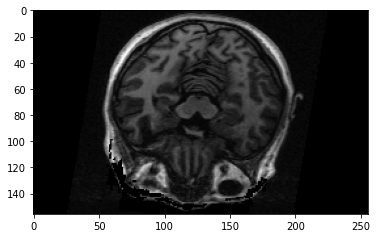

In [43]:
t1 = nb.load('data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz')
data = t1.get_fdata()
plt.imshow(data[:, :, data.shape[2] // 2].T, cmap='Greys_r')
print(data.shape)

(64, 64, 30, 184)


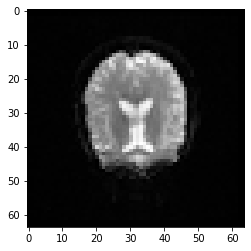

In [35]:
data = img.get_fdata()
plt.imshow(data[:, :, 15, 0].T, cmap='Greys_r')
print(data.shape)

<OrthoSlicer3D: data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz (256, 156, 256)>

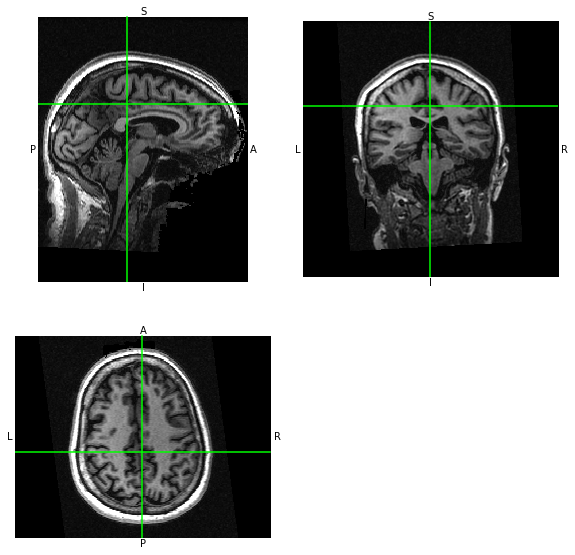

In [44]:
t1.orthoview()

In [47]:
!nib-ls data/002_S_0295/Session_0/*

data/002_S_0295/Session_0/anat_brain.nii.gz  float32 [170, 256, 161] 1.20x1.05x1.05   sform
data/002_S_0295/Session_0/warped_anat.nii.gz float32 [ 91, 109,  91] 2.00x2.00x2.00



In [ ]:
!nib-ls -H descrip /data/ds000114/sub-01/ses-test/*/sub-01_ses-test_T1w.nii.gz